# 1. PCA 실습

## Import numpy

In [1]:
import numpy as np

## 데이터 생성

In [2]:
mean = np.array([2, 3])
cov = np.array([[2, 1], [1, 2]])

In [3]:
data = np.random.multivariate_normal(mean, cov, (1000))
x = data[..., 0]
y = data[..., 1]

## 주어진 공분산 행렬로부터 eigenvalue와 eigenvector 구하기

In [4]:
eig, P = np.linalg.eig(cov)
print("Original Eigenvalues are :", eig)

Original Eigenvalues are : [3. 1.]


In [5]:
print(f"First eigenvector (Corresponding eigenvalue {eig[0]}) :", list(P[1]))
print(f"Second eigenvector (Corresponding eigenvalue {eig[1]}):", list(P[0]))

First eigenvector (Corresponding eigenvalue 3.0) : [0.7071067811865475, 0.7071067811865475]
Second eigenvector (Corresponding eigenvalue 1.0): [0.7071067811865475, -0.7071067811865475]


## 데이터 시각화

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(x, y, 'bo')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.xlim(-2, 10)
plt.ylim(-2, 10)
plt.show()

<Figure size 800x800 with 1 Axes>

## PCA - 1. 평균을 원점으로 이동

In [7]:
x_centralized = x - np.mean(x)
y_centralized = y - np.mean(y)

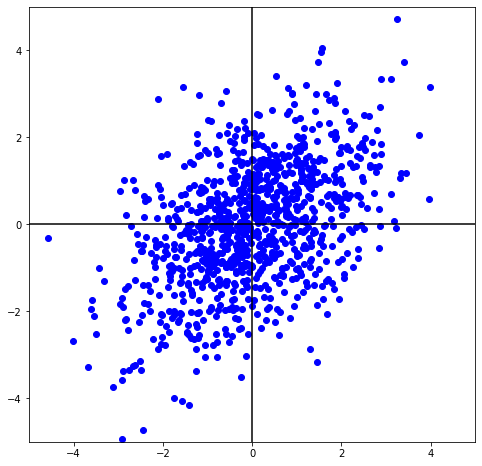

In [8]:
plt.figure(figsize=(8,8))
plt.plot(x_centralized, y_centralized, 'bo')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

In [9]:
print(x_centralized.shape)
print(y_centralized.shape)

(1000,)
(1000,)


## PCA - 2. 데이터로부터 공분산 행렬 추출

In [10]:
xy_centralized = np.array([[x_centralized[i], y_centralized[i]] for i in range(len(x_centralized))])

In [11]:
print(xy_centralized.shape)

(1000, 2)


In [12]:
cov_data = np.matmul(xy_centralized.T, xy_centralized) / len(xy_centralized)

In [13]:
print(cov_data)

[[1.88656481 0.90193631]
 [0.90193631 1.94556074]]


In [14]:
Sigma, Q = np.linalg.eig(cov_data)

## PCA - 3. 데이터로부터 획득한 공분산 행렬의 고유값 확인

In [15]:
print(Sigma)

[1.01364422 2.81848132]


In [16]:
print(Q)

[[-0.71857069 -0.69545393]
 [ 0.69545393 -0.71857069]]


## PCA - 4. 획득한 행렬 $Q$가 직교행렬(orthogonal matrix)인지 확인

In [17]:
print(np.matmul(Q.T, Q))
print(np.matmul(Q, Q.T))

[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


## PCA - 5. $Q$행렬을 축으로 분해. $Q$행렬의 각 column이 eigenvector이 됨

In [18]:
first_axis = Q[1]
second_axis = Q[0]

In [19]:
first_axis

array([ 0.69545393, -0.71857069])

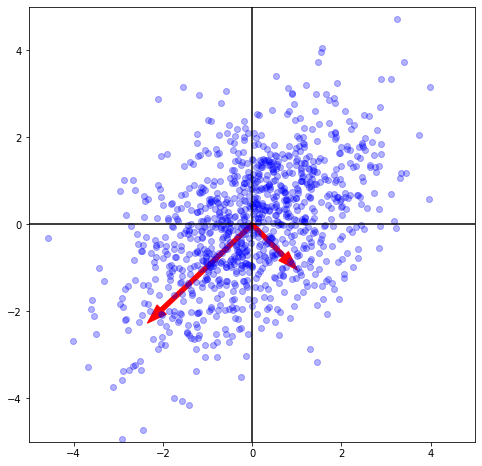

In [20]:
plt.figure(figsize=(8,8))
plt.plot(x_centralized, y_centralized, 'bo', alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.arrow(0, 0, Sigma[0] * first_axis[0], Sigma[0] * first_axis[1], width=0.1, color='r')
plt.arrow(0, 0, Sigma[1] * second_axis[0], Sigma[1] * second_axis[1], width=0.1, color='r')
plt.show()